### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy import stats
from sklearn import neighbors
from sklearn import datasets
from sklearn.metrics import pairwise_distances
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


from tp_knn_source import (rand_gauss, rand_bi_gauss, rand_tri_gauss,
                           rand_checkers, rand_clown, plot_2d, ErrorCurve,
                           frontiere_new, LOOCurve)


import seaborn as sns
from matplotlib import rc

plt.close('all')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'font.size': 16,
          'legend.fontsize': 16,
          'text.usetex': False,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)

sns.set_context("poster")
sns.set_palette("colorblind")
sns.set_style("white")
_ = sns.axes_style()


### Question 1


In [2]:
np.random.seed(42)  # fix seed globally

n = 100
# infer the parameters and choose their values
mu, sigma = [1, 1], [0.1, 0.1]
rand_gauss(n, mu, sigma)

n1_1 = 20
n2_1 = 20
# TODO for four functions
X1, y1 = rand_bi_gauss(n1_1, n2_1)

n1_2 = 50
n2_2 = 50
n3_2 = 50
X2, y2 = rand_tri_gauss(n1_2, n2_2, n3_2)

n1_3 = 50
n2_3 = 50

X3, y3 = rand_checkers(n1_3, n2_3, 0.1)
n1_4 = 150
n2_4 = 150
X4, y4 = rand_clown(n1_4, n2_4)


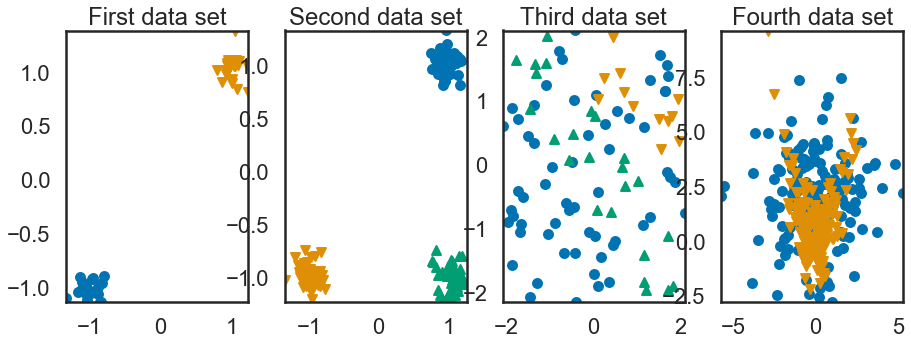

In [3]:
############################################################################
#     Displaying labeled data
############################################################################

plt.show()
plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))
plt.subplot(141)
plt.title('First data set')
plot_2d(X1, y1)

plt.subplot(142)
plt.title('Second data set')
plot_2d(X2, y2)

plt.subplot(143)
plt.title('Third data set')
plot_2d(X3, y3)

plt.subplot(144)
plt.title('Fourth data set')
plot_2d(X4, y4)


The First data set gives two gaussian distributions with given number of samples for each distribution and given params as mu and sigma <br>
__________________________________
The Second data set gives three gaussian distributions with given number of samples for each distribution and given params as mu and sigma <br>
___________________
The Third data set gives random noisy sample with a shape of  ${(int(n1/8)+int(n2/8))*8}$  with given n1 and n2 and mus and sigmas<br>
____
The Fourth data set gives two distributions with given number of samples for each distribution and given params as mu and sigma,<br> but the first distribution coordinates are equal to  <br> ${(FirstNormalDistributionN1 ,}$<br>${ FirstNormalDistributionN1 * FirstNormalDistributionN1 + sigma1 * SecondNormalDistributionN1)}$<br>
The second coordinates are equal to ${(sigma2 * FirstNormalDistributionN2 , sigma2 * SecondNormalDistributionN2 + 2 \sigma)}$<br>
________

### Question 2


As an adaptation of this algorithm to regression, the predicted value could be the mean of nearest neighbors value (for example, if k =11 so the value will be ${(valuesOfElevenNearestNeighbors) /11}$)

### The $k$-NN algorithm

In [41]:
# Write your own implementation
class KNNClassifier(BaseEstimator, ClassifierMixin):
    """ Home made KNN Classifier class"""

    def __init__(self, n_neighbors=1, weights=None):
        self.n_neighbors = n_neighbors
        self.weights = weights

    def fit(self, X, y):
        # no work is done at fit time, except storing training data
        self.X_ = X
        self.y_ = y
        return self

    def predict(self, X):
        n_samples, n_features = X.shape
        # TODO : Compute all pairwise distances between X and self.X_
        d = pairwise_distances(X, self.X_)

        # TODO : Get indices to sort them
        sorted_indices = np.argsort(d)
        d = np.take_along_axis(d, sorted_indices, axis=1)[:, :self.n_neighbors]
        # TODO Get indices of neighbors
        neighbors_indices = sorted_indices[:, :self.n_neighbors]

        # TODO: Get labels of neighbors
        Y_neighbors = self.y_[neighbors_indices]

        # TODO : Find the predicted labels y for each entry in X
        # You can use the scipy.stats.mode function
        # y_pred,_ = stats.mode(Y_neighbors,axis=1)
        # ? we consider an empty array
        max_ = np.array([])
        for i in np.unique(Y_neighbors):
            N_repetitions = np.sum(
                (Y_neighbors == i) * (self.weights(d) if self.weights else 1), axis=1)
            max_ = np.append(max_, N_repetitions)
        y_pred = np.unique(Y_neighbors)[np.argmax(
            max_.reshape(-1, Y_neighbors.shape[0]).T, axis=1)] if max_.any() else np.array([])
        return y_pred.ravel()


# TODO check that all labels match

# From now on use the Scikit-Learn implementation


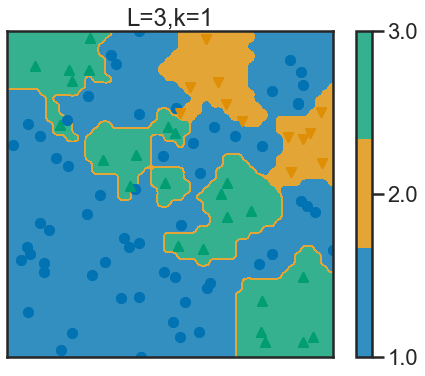

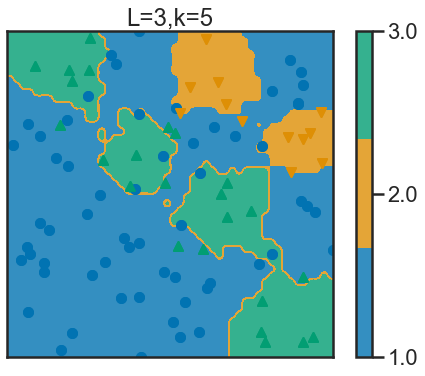

In [7]:
# question 4
n1 = n2 = 200
sigma = 0.1
X, y = X3, y3


def KnnWithFrontiere(X, y, n_neighbors=1):
 # the k in k-NN
    knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X, y)
    plt.figure()
    plot_2d(X, y)
    n_labels = 3
    frontiere_new(knn, X, y, w=None, step=50, alpha_choice=1,
                  n_labels=n_labels, n_neighbors=n_neighbors)


KnnWithFrontiere(X, y, 1)
KnnWithFrontiere(X, y, 5)


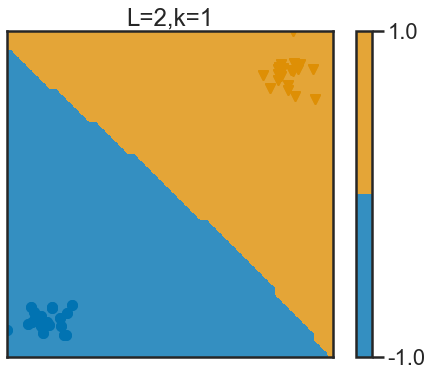

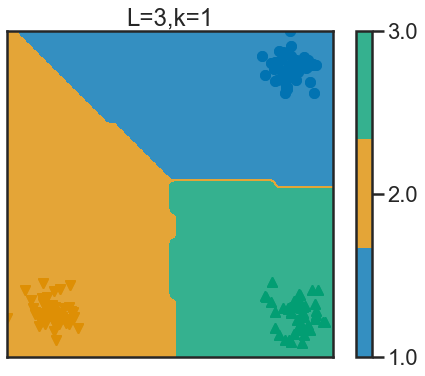

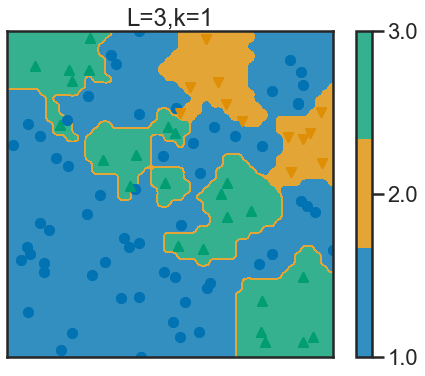

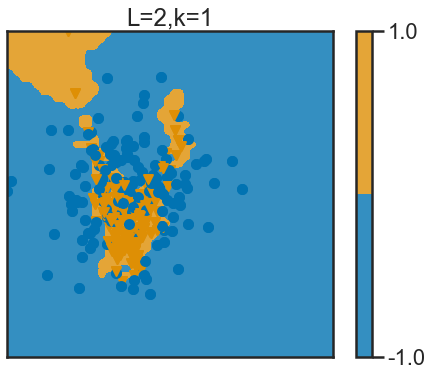

In [8]:
# test now for all datasets

n_neighbors = 1  # the k in k-NN
knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)


# TODO something like:
for (X, y, n) in [(X1, y1, 2), (X2, y2, 3), (X3, y3, 3), (X4, y4, 2)]:

    # TODO: fit your knn in the loop
    knn.fit(X, y)
    plt.figure()
    plot_2d(X, y)
    n_labels = n
    frontiere_new(knn, X, y, w=None, step=50, alpha_choice=1,
                  n_labels=n_labels, n_neighbors=n_neighbors)


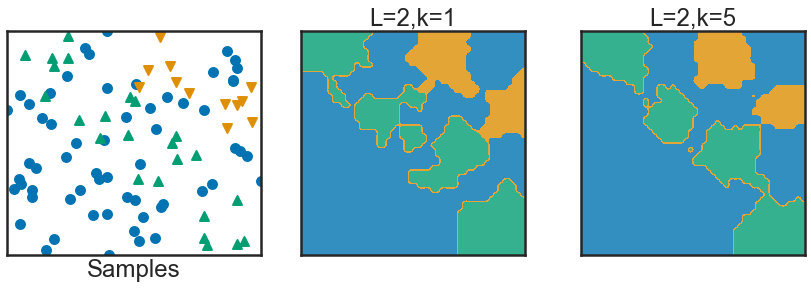

In [21]:
# Display the predictions when varying the value of k

n1 = n2 = 200
sigma = 0.1
X,y =X3,y3
plt.figure(3, figsize=(12, 8))
plt.subplot(2,3,1)
plot_2d(X,y)
plt.xlabel('Samples')
ax = plt.gca()
ax.get_yaxis().set_ticks([])
ax.get_xaxis().set_ticks([])

for n_neighbors,i in zip((1,5),(2,3)):
    # TODO 
    plt.subplot(2,3,i)
    # todo put a label indicating the number of neighbors used in the algo
    knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X,y)

    frontiere_new(knn, X, y, w=None, step=50, alpha_choice=1,n_labels=2,
                  colorbar=False, samples=False,n_neighbors=n_neighbors)
    plt.draw()  # update plot

plt.tight_layout()

In [22]:
# Scores on train data
n_neighbors = 1
n1 = n2 = 200
sigma = 0.1
X_train = X3[::2]
Y_train = y3[::2].astype(int)
X_test = X3[1::2]
Y_test = y3[1::2].astype(int)
knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train,Y_train)
print(f"the score on training is :{knn.score(X_train,Y_train)}")
print(f"the score on testing is :{knn.score(X_test,Y_test)}")



the score on training is :1.0
the score on testing is :0.7916666666666666


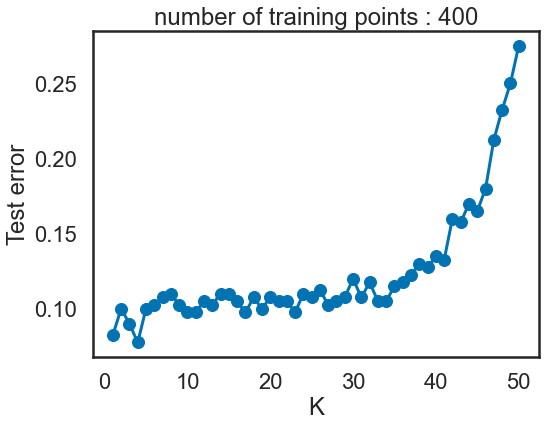

In [23]:
# Scores on left out data

n1 = n2 = 200
sigma = 0.1
data4_X, data4_y = rand_checkers(2 * n1, 2 * n2, sigma)

X_train = data4_X[::2]
Y_train = data4_y[::2].astype(int)
X_test = data4_X[1::2]
Y_test = data4_y[1::2].astype(int)


# TODO instantiate ErrorCurve with k_range=range(1, 51)
error_curve = ErrorCurve(k_range=range(1, 51))
# TODO fit it, plot it
error_curve.fit_curve(X_train, Y_train, X_test, Y_test)
error_curve.plot()

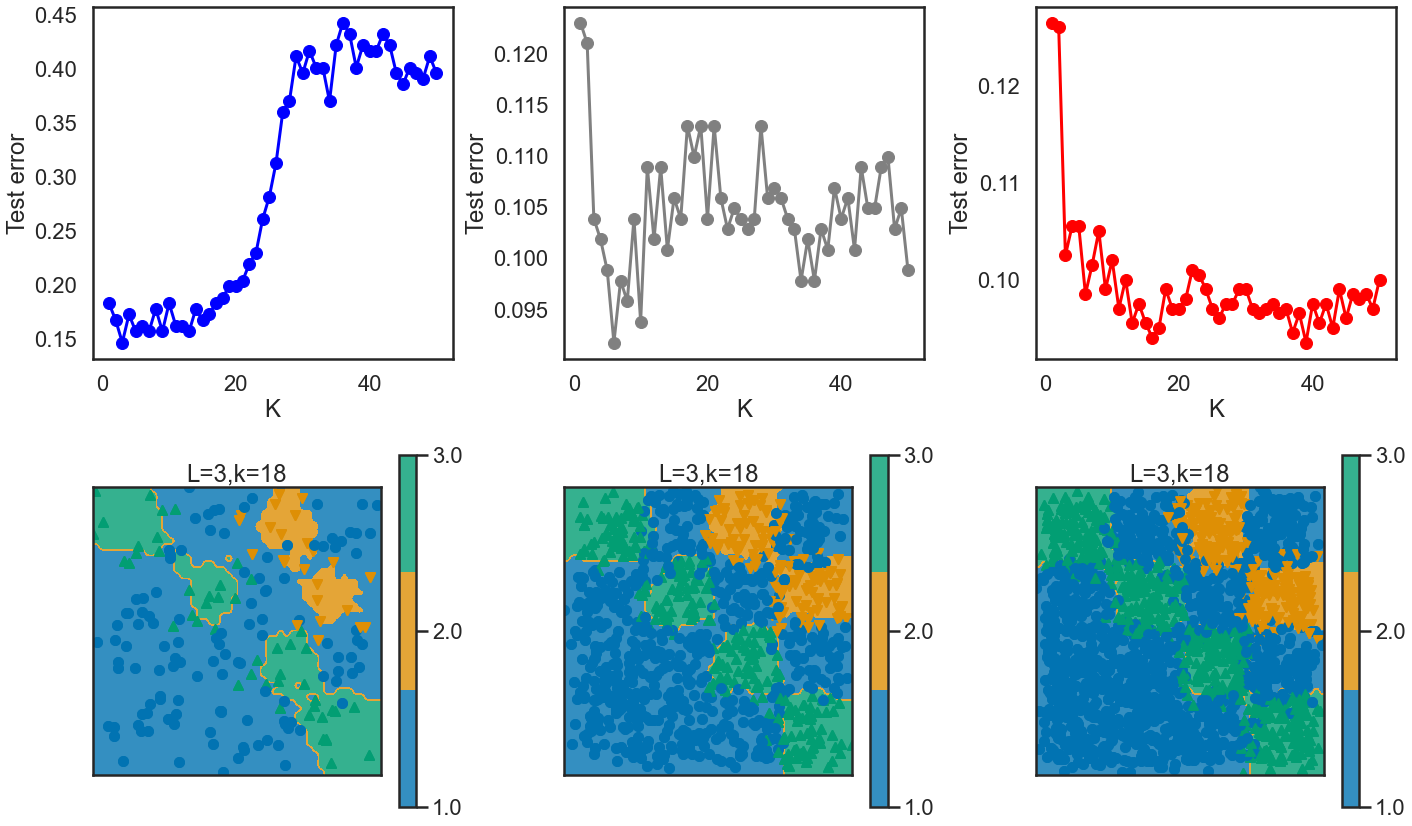

In [27]:
collist = ['blue', 'grey', 'red', 'purple', 'orange', 'salmon', 'black',
           'fuchsia']

sigma = 0.1

range_n_samples = [100, 500, 1000]
niter = len(range_n_samples)
plt.figure(5, figsize=(20, 12))
for n in range(niter):
    plt.subplot(2,3,n+1)
    n1 = n2 = range_n_samples[n]
    X_train, Y_train = rand_checkers(n1, n2, sigma)
    X_test, Y_test = rand_checkers(n1, n2, sigma)
    # TODO fit and plot with color varying from collist
    error_curve.fit_curve(X_train, Y_train, X_test, Y_test)
    error_curve.plot(color=collist[n % len(collist)], maketitle=False,)
    
    plt.subplot(2,3,n+4)
    plot_2d(X_train, Y_train)
    n_neighbors = 18
    knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, Y_train)

    frontiere_new(knn, X_train, Y_train, w=None,
                    step=50, alpha_choice=1, n_labels=3, n_neighbors=n_neighbors)
plt.tight_layout()
plt.legend(["training size : %d" % n for n in range_n_samples],
        loc='upper left')



present best k for each training sample size and conclude that best k depends on training sample size

### Question 7

What are the pros and cons of this classifier?

### Question 8

<class 'sklearn.utils.Bunch'>
inspect digits attributes 
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0]
1797
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14

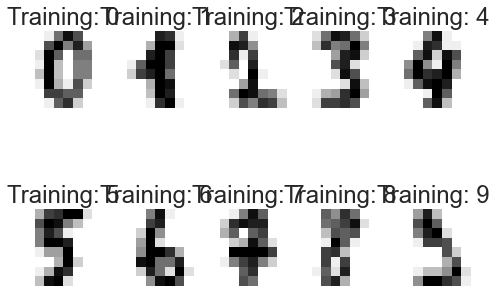

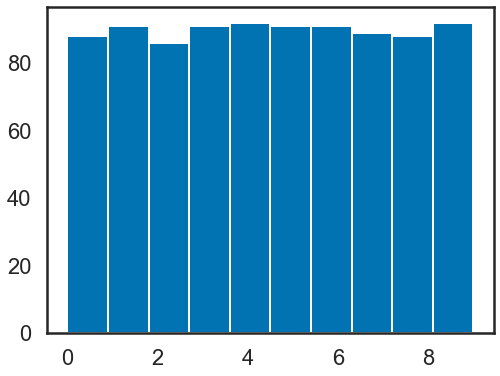

In [32]:
# test k-NN on digits dataset

# The digits dataset
digits = datasets.load_digits()

print(type(digits))
# A Bunch is a subclass of 'dict' (dictionary)
# help(dict)


print("inspect digits attributes ")
print(digits.keys())
print(digits.target[:50])
print(len(digits.data))
print(digits.data[0])
print(digits['data'][0])
print(digits['images'][0])
print(digits.data[0] == digits['data'][0])


for idx, (img, lbl) in enumerate(list(zip(digits.images,
                                          digits.target))[10:20]):
    plt.subplot(2, 5, idx + 1)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='None')
    plt.title('Training: %i' % lbl)

n_samples = len(digits.data)

X_train = digits.data[:n_samples // 2]
Y_train = digits.target[:n_samples // 2]
X_test = digits.data[n_samples // 2:]
Y_test = digits.target[n_samples // 2:]

plt.figure(2)
# todo plot histogram of Y_test
plt.hist(Y_test)


# TODO fit, print score
knn = neighbors.KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, Y_train)
score = knn.score(X_test, Y_test)
Y_pred = knn.predict(X_test)
print(f'score : {score}')

### Question 9

[[87  0  0  0  1  0  0  0  0  0]
 [ 0 82  5  1  0  1  0  0  0  2]
 [ 1  0 79  6  0  0  0  0  0  0]
 [ 0  0  0 81  0  3  0  4  1  2]
 [ 2  0  0  0 87  0  0  2  1  0]
 [ 0  0  0  0  0 85  3  0  0  3]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  1  0  0  0  0 88  0  0]
 [ 0  6  1  6  0  4  1  1 68  1]
 [ 1  0  0  4  0  2  0  0  1 84]]


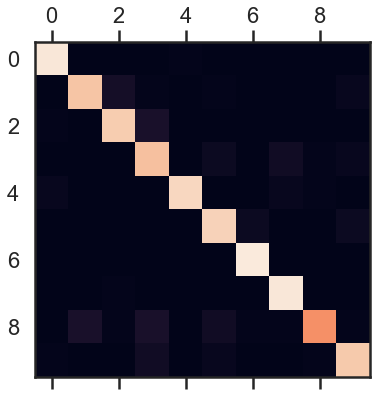

In [33]:
# Compute confusion matrix

conf_mat = confusion_matrix(Y_test, Y_pred)
print(conf_mat)

# TODO normalize CM so that each row sums to 1
conf_mat_normalized = confusion_matrix(Y_test, Y_pred, normalize='true')
plt.matshow(conf_mat_normalized)


### Question 10

the cross validation score is 0.9399915818754118


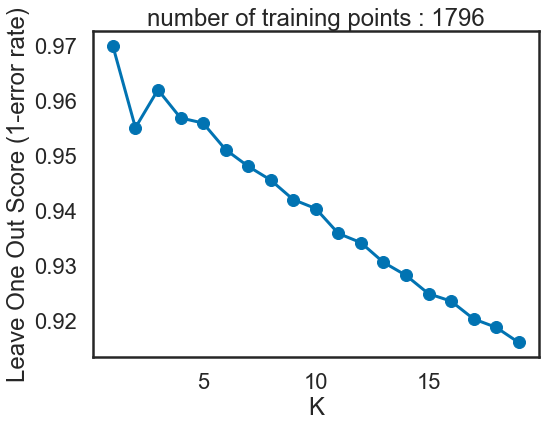

In [34]:
# Estimate k with cross-validation

loo_curve = LOOCurve(k_range=list(range(1, 20)))
# TODO fit it
loo_curve.fit_curve(X=digits.data, y=digits.target)
# TODO print cross val scores
print(f"the cross validation score is {np.mean(loo_curve.cv_scores)}")

plt.figure()
# TODO plot curve
loo_curve.plot()

Observing the best k which minimize the error rate is k = 1 but we better choose k = 3 to avoid overfiting 

### Question 11

The accuracy value is 11 , 16


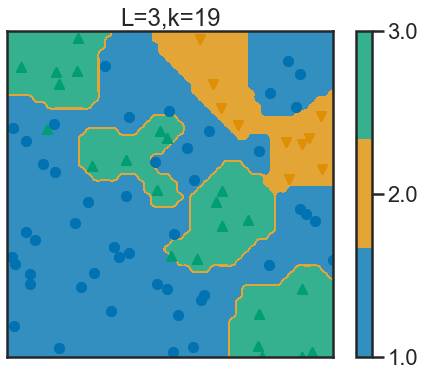

In [39]:
# Implement weights for the kNN classifier


def weights(dist):
    """Returns an array of weights, exponentially decreasing in the square
    of the distance.

    Parameters
    ----------
    dist : a one-dimensional array of distances.

    Returns
    -------
    weight : array of the same size as dist
    """
    # TODO: use weights equal to exp(- dist^2 / 0.1)
    return np.exp(- dist ** 2 / 0.1)
    # return dist


n_neighbors = 19

# Focus on dataset 2
index_train_test = int(4 * (n1_3 + n2_3) / 5)
X_train = X3[:index_train_test]
Y_train = y3[:index_train_test]
X_test = X3[index_train_test:]
Y_test = y3[index_train_test:]
wknn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
wknn.fit(X_train, Y_train)
plt.figure(4)
plot_2d(X_train, Y_train)


frontiere_new(wknn, X_train, Y_train, w=None, step=50,
              alpha_choice=1, n_neighbors=n_neighbors)


Y_pred = wknn.predict(X_test)
print(f"The accuracy value is {(Y_pred==Y_test).sum()} , {len(Y_test)}")


In [43]:
knn = KNNClassifier(n_neighbors=n_neighbors, weights=weights)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

sknn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
sknn.fit(X_train, Y_train)
Y_pred_skl = sknn.predict(X_test)

print(f"The matching : {(Y_pred==Y_pred_skl).all()}\n")

print(
    f"The accuracy value our model is {(Y_pred==Y_test).sum()} , {len(Y_test)}")
print(
    f"The accuracy value sklearn is {(Y_test==Y_pred_skl).sum()} , {len(Y_test)}")
print(
    f"The accuracy value o!f matching is {(Y_pred==Y_pred_skl).sum()} , {len(Y_test)}")

The matching : True

The accuracy value our model is 11 , 16
The accuracy value sklearn is 11 , 16
The accuracy value o!f matching is 16 , 16


In [47]:
%%timeit
knn = KNNClassifier(n_neighbors=n_neighbors, weights=weights)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)


604 ns ± 66.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [49]:
%%timeit
sknn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
sknn.fit(X_train, Y_train)
Y_pred_skl = sknn.predict(X_test)


1.15 ms ± 181 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
print(f"The matching : {(Y_pred==Y_pred_skl).all()}\n")

print(
    f"The accuracy value our model is {(Y_pred==Y_test).sum()} , {len(Y_test)}")
print(
    f"The accuracy value sklearn is {(Y_test==Y_pred_skl).sum()} , {len(Y_test)}")
print(
    f"The accuracy value o!f matching is {(Y_pred==Y_pred_skl).sum()} , {len(Y_test)}")

The matching : True

The accuracy value our model is 175 , 192
The accuracy value sklearn is 175 , 192
The accuracy value o!f matching is 192 , 192
